# Model-agnostic analysis

**Example using the model_agnostic function to evaluate a trained regression model**

The **model_agnostic** function in PyMLR performs a suite of model-agnostic analyses to test a trained regression model. The outputs of the model-agnostic analysis include the following:

    - Model skill metrics (R-squared, MSE, RMSE, etc.)
    - Predicted Values vs. Actual Values Plot 
    - Predicted Values vs. Residuals Plot 
    - SHAP Beeswarm Plot 
        (feature importance and direction for all samples)
    - SHAP Bar Plot 
        (ranks features across all samples by mean absolute SHAP value)
    - SHAP Waterfall Plot 
        (of first observation only)
    - Permutation Importance Plot
        (model performance drop when a feature is shuffled)
    - Partial Dependence Plots (PDP) 
        (shows average effect of a feature on predictions)
    - ICE (Individual Conditional Expectation) 
        (how predictions change for one feature across samples)

In this example we will perform model-agnostics on a regression model that is first trained with XGBoost using **xgb_auto**. The **xgb_auto** function automatically finds the optimum set of cross-validated hyper-parameters and then outputs the fitted regression model and summary statistics using XGBoost with optuna. This example also shows how to check the cross-validation of the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data from sklearn

Before running this notebook, first install the PyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [ ]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the train data subset

In the next step, we will automatically find the best cross-validated hyper-parameters for XGBoost using optuna. Then we will fit the model using the training data with the best parameters. 

After this training step is completed, proceed to the next step to check how well the predictions from the training data match the predictions using the testing data. 

Running optuna to find best parameters, could take a few minutes, please wait...
Fitting XGBRegressor model with best parameters, please wait ...

XGBRegressor goodness of fit to training data in model_outputs['stats']:

| Statistic          |   XGBRegressor |
|:-------------------|---------------:|
| R-squared          |       0.647403 |
| MSE                |    2142.52     |
| RMSE               |      46.2873   |
| Explained Variance |       0.656875 |
| MAE                |      37.5637   |
| Max Error          |     143.401    |
| MAPE               |       0.311861 |
| MSLE               |       0.120723 |
| n_samples          |     353        |

Done
Time elapsed: 672.01 sec



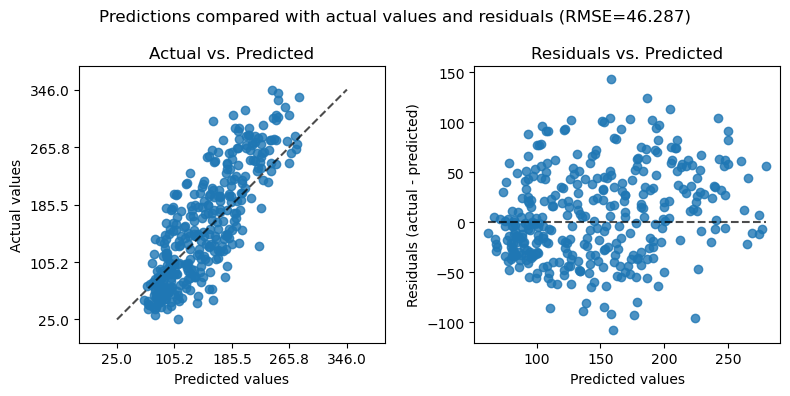

In [3]:
# optional keyword arguments
kwargs = {
    # [min, max] range of params that are optimized by optuna
    'random_state': 42,             # random seed for reproducibility
    'n_trials': 50,                 # number of optuna trials
    'learning_rate': [1e-4, 1.0],   # step size shrinkage (also called eta)
    'max_depth': [3, 12],           # maximum depth of a tree
    'min_child_weight': [1, 10],    # minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.5, 1],          # fraction of samples used for training each tree
    'colsample_bytree': [0.5, 1],   # fraction of features used for each tree
    'gamma': [1e-8, 10.0],          # minimum loss reduction to make a split
    'reg_lambda': [1e-8, 10.0],     # L2 regularization term on weights
    'alpha': [1e-8, 10.0],          # L1 regularization term on weights
    'n_estimators': [100, 1000]     # number of boosting rounds (trees)
}    

from PyMLR import xgb_auto
train_model, train_output = xgb_auto(X_train, y_train, **kwargs)

## Model-agnostic analysis using the test data

In the next step we will perform a comprehensive suite of model-agnostics of the trained model using the testing data. The testing data we will be standardized and encoded using the same preprocess_result encoder and scaler that was used to on the training data to avoid data leakage between the training and testing data. We will also use the same optimized selected features that were determined during the training.

The model-agnostic plots will be saved in the output directory (default output_dir= 'model_agnostic')

Performing 4-step model agnostic analysis, please wait...

Step 1: Model skill metrics and residuals plot, please wait...

Model skill metrics:

| Statistic          |   Regressor |
|:-------------------|------------:|
| R-squared          |    0.486456 |
| MSE                | 2720.83     |
| RMSE               |   52.1616   |
| Explained Variance |    0.493114 |
| MAE                |   42.6965   |
| Max Error          |  129.803    |
| MAPE               |    0.371168 |
| MSLE               |    0.161606 |
| n_samples          |   89        |



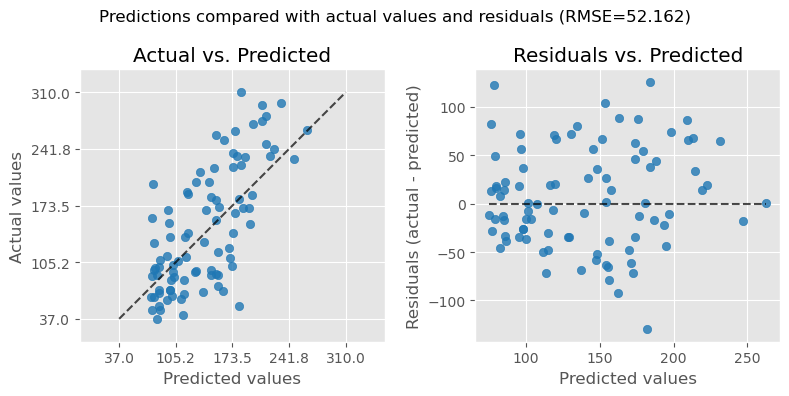

Step 2: SHAP Beeswarm, Bar importance, and Waterfall, please wait...


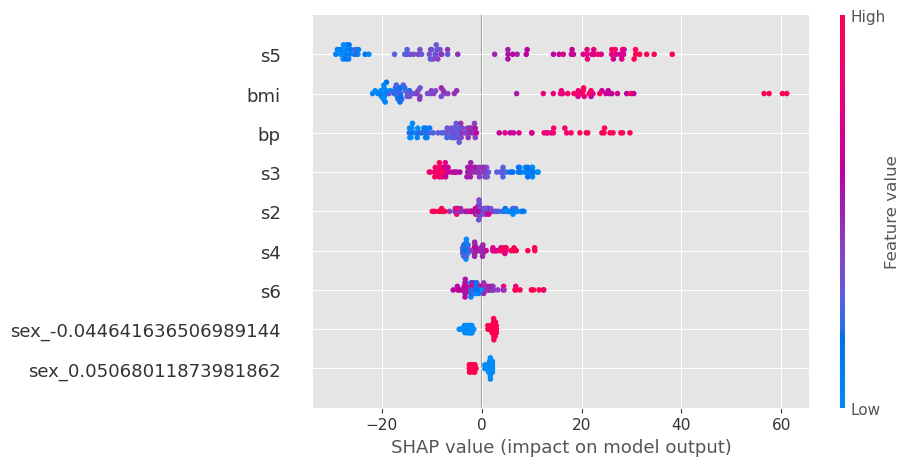

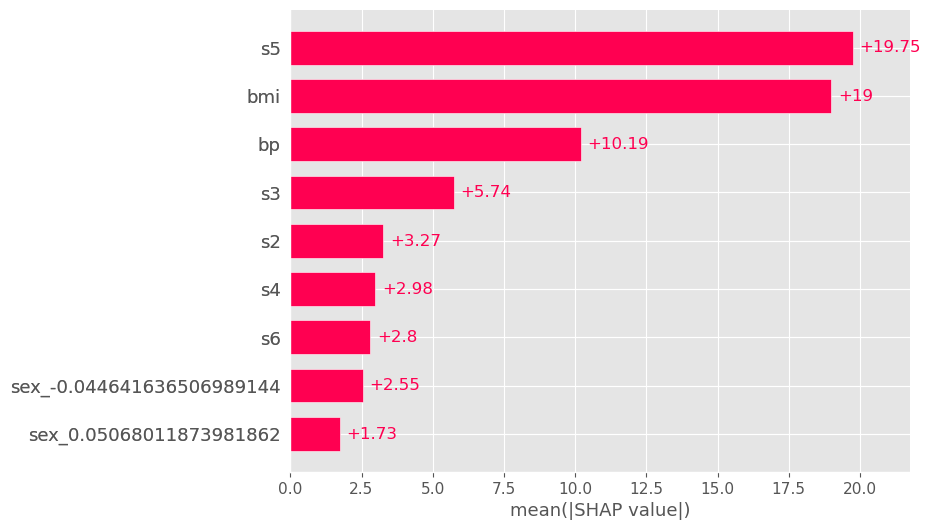

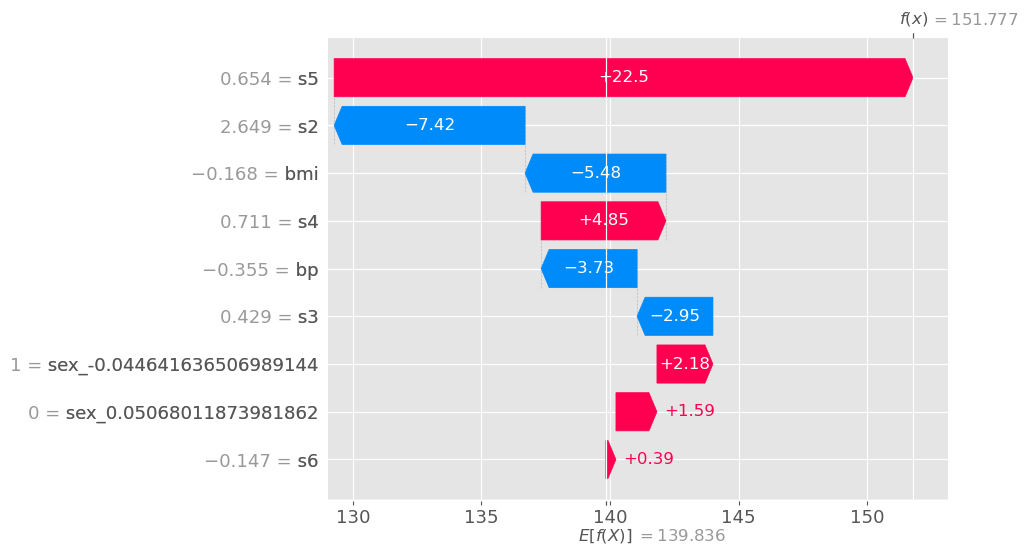

Step 3: Permutation Importance, please wait...


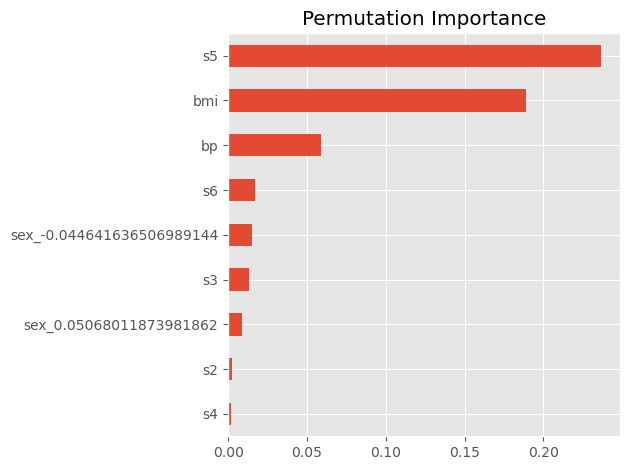

Step 4: PDP + ICE plots of each continuous feature, please wait...
processing feature:  s5


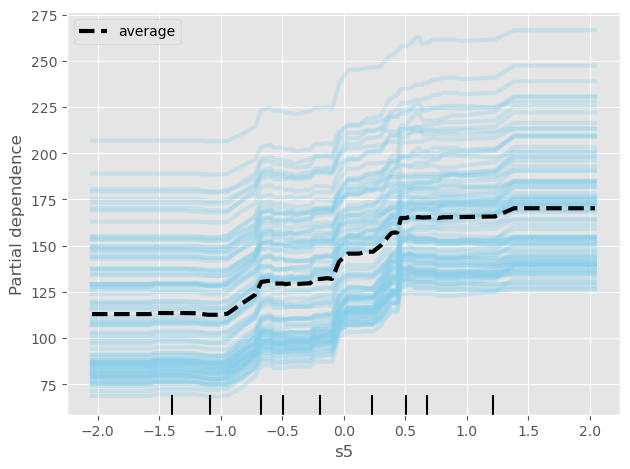

processing feature:  bmi


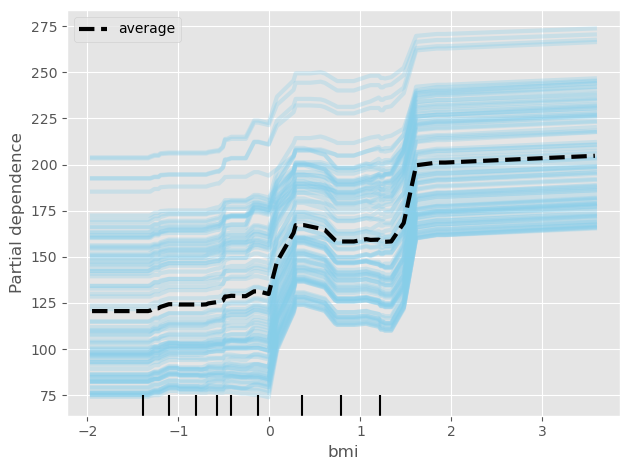

processing feature:  bp


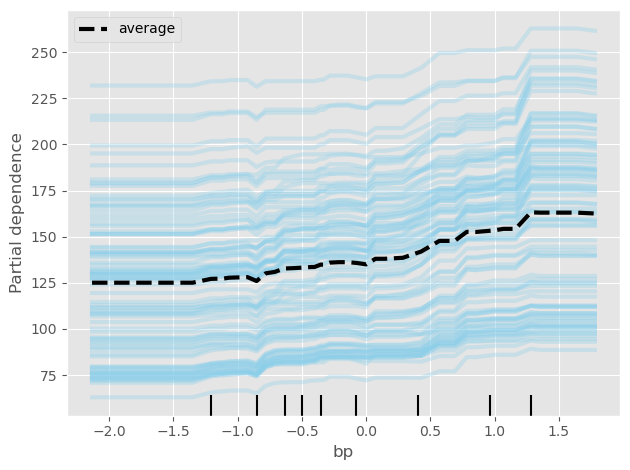

processing feature:  s3


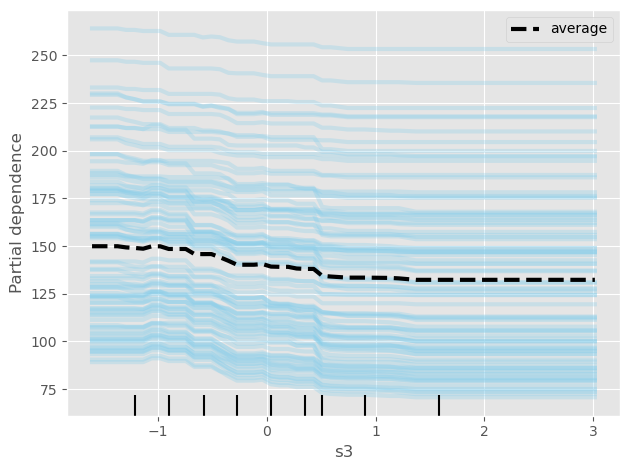

processing feature:  s2


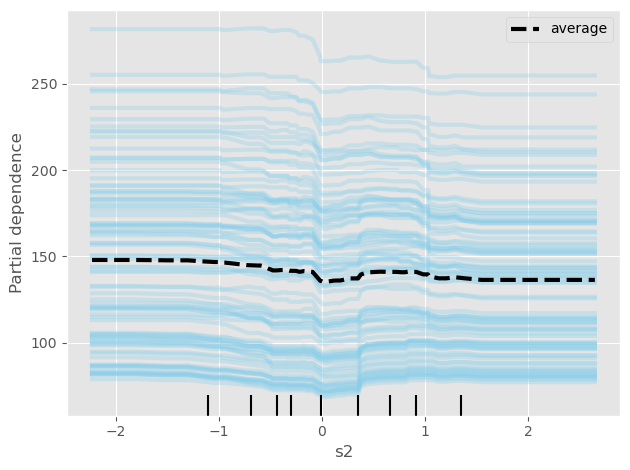

processing feature:  s4


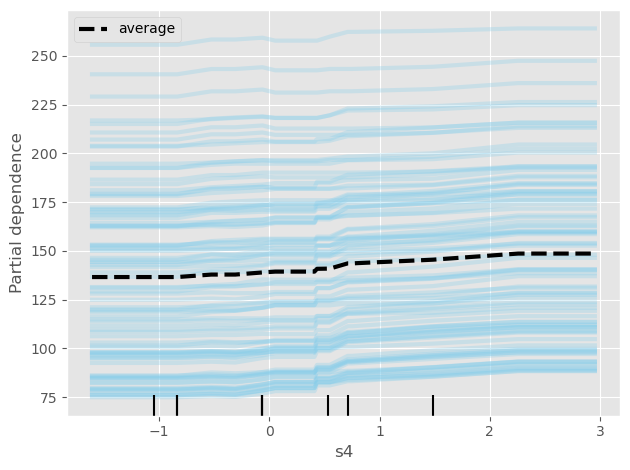

processing feature:  s6


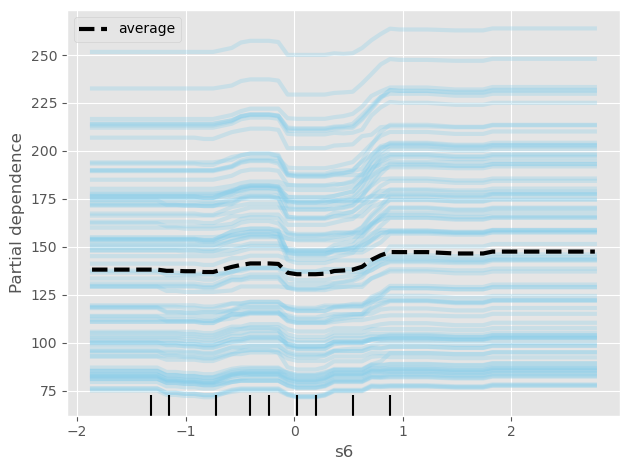

Interpretability plots saved to: model_agnostic
Done
Time elapsed: 13.84 sec



In [8]:
from PyMLR import model_agnostic
test_output = model_agnostic(train_model, X_test, y_test, 
    preprocess_result= train_output['preprocess_result'],
    selected_features= train_output['selected_features'],
    output_dir= 'model_agnostic',
    show=True)

## Display the results of the hyperparameter optimization

The results of the optuna optimization study were saved in the previous step when the model was trained with the training data subset. The output dictionary that we called train_output in that step contains a key named optuna_study which contains the results of the optimized optuna study.

In the next step we will use the **show_optuna** function of PyMLR to display the results of the optimized cross-validated optuna study to show the selected optimum values for the hyperparameters, the optimization history, and the relationships between the hyperparameters and their importance for the scoring criteria.

Best parameters:

learning_rate: 0.023235875472640756
max_depth: 3
min_child_weight: 9
subsample: 0.7631821831455501
colsample_bytree: 0.769336677654604
gamma: 2.1637126724594746
reg_lambda: 0.0037317259254322217
alpha: 0.05736837832976808
n_estimators: 127
num_features: 9
selector_type: mutual_info

Best score: -57.3625416439607



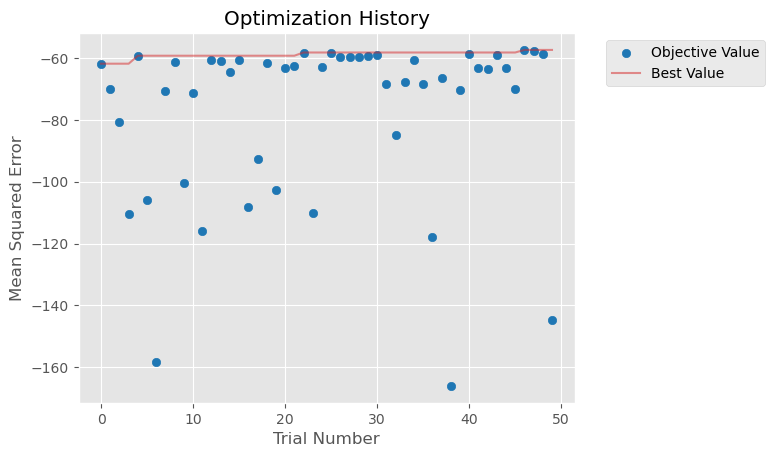

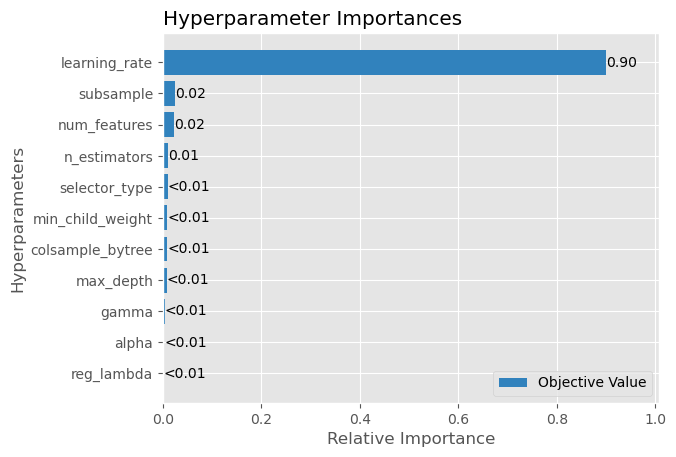

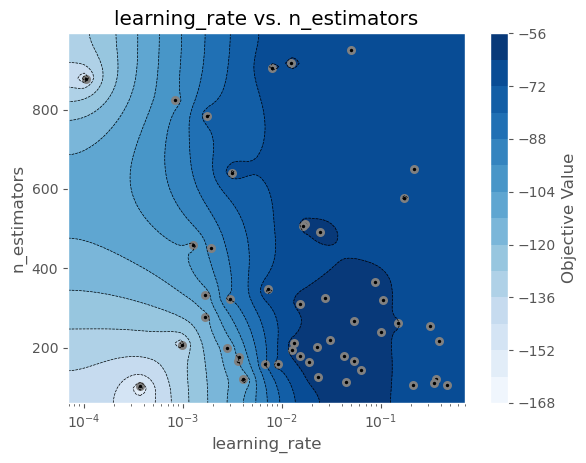

In [5]:
from PyMLR import show_optuna
show_optuna(train_output['optuna_study'])

## User instructions

In [6]:
help(model_agnostic)

Help on function model_agnostic in module PyMLR:

model_agnostic(model, X_test, y_test, preprocess_result=None, selected_features=None, output_dir='agnostic_plots', show=True)
    Model-agnostic analysis of a trained
    Machine Learning linear regression model

    Plots of the following model agnostics are provided:

    - Model skill metrics
    - Residual vs. Predicted Plot
        (compares predictions vs residuals)
    - Prediction Error Plot
        (compares predictions vs. actual values)
    - Permutation Importance
        (model performance drop when a feature is shuffled)
    - Partial Dependence Plots (PDP)
        (shows average effect of a feature on predictions)
    - ICE (Individual Conditional Expectation)
        (how predictions change for one feature across samples)
    - SHAP Summary Plot (Beeswarm)
        (feature importance and direction across all samples)
    - SHAP Bar Plot
        (ranks features by mean absolute SHAP value)
    - SHAP Waterfall Plot (of fi